In [3]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import imgkit
import pdfcrowd

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as offline
import json
import folium
from matplotlib import pyplot as plt

## Data Load

In [4]:
edge_daegu_infect = np.load('./data/edge_daegu_infect.npy', allow_pickle=True)
edge_daegu_infect = edge_daegu_infect[1:]
edge_daegu_user_1st = np.load('./data/edge_daegu_user_1st.npy', allow_pickle=True)
edge_daegu_user_2nd = np.load('./data/edge_daegu_user_2nd.npy', allow_pickle=True)
edge_daegu_user_3rd = np.load('./data/edge_daegu_user_3rd.npy', allow_pickle=True)
edge_daegu_user_4th = np.load('./data/edge_daegu_user_4th.npy', allow_pickle=True)
edge_daegu_user_5th = np.load('./data/edge_daegu_user_5th.npy', allow_pickle=True)
node_daegu_infect = np.load('./data/node_daegu_infect.npy', allow_pickle=True)
node_daegu_user = np.load('./data/node_daegu_user.npy', allow_pickle=True)
edge_daegu_user = np.concatenate((edge_daegu_user_1st,edge_daegu_user_2nd,edge_daegu_user_3rd,edge_daegu_user_4th,edge_daegu_user_5th))
del (edge_daegu_user_1st, edge_daegu_user_2nd, edge_daegu_user_3rd, edge_daegu_user_4th, edge_daegu_user_5th)

In [5]:
edge_daegu_user = np.array([edge_daegu_user[:,0]+edge_daegu_user[:,1], edge_daegu_user[:,2], edge_daegu_user[:,3], edge_daegu_user[:,4]]).transpose()
ymd_time_lst = np.sort(np.unique(edge_daegu_user[:,0]))
ymd_time_lst = [ymd_time_lst[i][0:4]+'-'+ymd_time_lst[i][4:6]+'-'+ymd_time_lst[i][6:8]+'-'+ymd_time_lst[i][8:10] for i in range(len(ymd_time_lst))]
dong_lst = np.sort(np.unique(edge_daegu_user[:,1]))

In [39]:
edge_daegu_infect = np.array([edge_daegu_infect[:,0]+edge_daegu_infect[:,1], edge_daegu_infect[:,2], edge_daegu_infect[:,3], edge_daegu_infect[:,4]]).transpose()

In [110]:
len(np.unique(edge_daegu_user[:,0]))

696

# 행정동 상주인구 Choropleth with slider

## 배경지도 데이터

In [100]:
geo_path = './data/HangJeongDong_ver20200401.geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'name': 'HangJeongDong_ver20200401',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 0,
    'adm_nm': '서울특별시 종로구 사직동',
    'adm_cd': '1101053',
    'adm_cd2': '1111053000'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.97688884274817, 37.575650779448786],
       [126.9770344988775, 37.569194530054546],
       [126.97597472821249, 37.569336299425764],
       [126.97537470991254, 37.56931556702156],
       [126.97433193562325, 37.56926180051753],
       [126.96904837001854, 37.56819441770833],
       [126.96854493603384, 37.56842767961276],
       [126.9666499598212, 37.569491655206576],
       [126.96628175024485, 37.5697007347987],
       [126.9660973270804, 37.5698565097237],
       [126.96572852922577, 37.570183936115114],
       [126.96592699822128, 37.5703188056862],
       [126.96601094018429, 37.57154839557748],
       [126.9636

In [101]:
for i in range(len(geo_str['features'])):
    geo_str['features'][i]['properties']['dong'] = geo_str['features'][i]['properties']['adm_nm'].split()[-1]

In [158]:
geo_str

{'type': 'FeatureCollection',
 'name': 'HangJeongDong_ver20200401',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 0,
    'adm_nm': '서울특별시 종로구 사직동',
    'adm_cd': '1101053',
    'adm_cd2': '1111053000',
    'dong': '사직동'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.97688884274817, 37.575650779448786],
       [126.9770344988775, 37.569194530054546],
       [126.97597472821249, 37.569336299425764],
       [126.97537470991254, 37.56931556702156],
       [126.97433193562325, 37.56926180051753],
       [126.96904837001854, 37.56819441770833],
       [126.96854493603384, 37.56842767961276],
       [126.9666499598212, 37.569491655206576],
       [126.96628175024485, 37.5697007347987],
       [126.9660973270804, 37.5698565097237],
       [126.96572852922577, 37.570183936115114],
       [126.96592699822128, 37.5703188056862],
       [126.96601094018429, 37.57154839557748

## sty data reconstruction

In [105]:
dong_plot_lst = [dong for i in range(696) for dong in dong_lst]
ymd_time_plot_lst = [ymd_time for ymd_time in ymd_time_lst for i in range(142)]

In [111]:
sty_infect_df_plot[sty_infect_df_plot['num']==sty_infect_df_plot['num'].max()]

NameError: name 'sty_infect_df_plot' is not defined

In [113]:
sty_infect_df_plot = pd.DataFrame(node_daegu_infect.reshape([98832, 1]))
sty_infect_df_plot["ymd_time"] = ymd_time_plot_lst
sty_infect_df_plot['dong'] = dong_plot_lst
sty_infect_df_plot.columns = ['num', 'ymd_time', 'dong']
sty_infect_df_plot['num'] = (sty_infect_df_plot['num']-sty_infect_df_plot['num'].min())/(sty_infect_df_plot['num'].max()-sty_infect_df_plot['num'].min())
sty_infect_df_plot

num       ymd_time  dong
0      0.000000  2020-02-01-00   가창면
1      0.111111  2020-02-01-00   감삼동
2      0.000000  2020-02-01-00   검단동
3      0.074074  2020-02-01-00  고산1동
4      0.148148  2020-02-01-00  고산2동
...         ...            ...   ...
98827  0.037037  2020-02-29-23   화원읍
98828  0.074074  2020-02-29-23  황금1동
98829  0.037037  2020-02-29-23  황금2동
98830  0.037037  2020-02-29-23  효목1동
98831  0.000000  2020-02-29-23  효목2동

[98832 rows x 3 columns]

In [13]:
sty_user_df_plot[sty_user_df_plot['num']==1]

num       ymd_time dong
58100  1.0  2020-02-18-01  다사읍

In [164]:
sty_user_df_plot = pd.DataFrame(node_daegu_user.reshape([98832, 1]))
sty_user_df_plot["ymd_time"] = ymd_time_plot_lst
sty_user_df_plot['dong'] = dong_plot_lst
sty_user_df_plot.columns = ['num', 'ymd_time', 'dong']
sty_user_df_plot['num'] = (sty_user_df_plot['num']-sty_user_df_plot['num'].min())/(sty_user_df_plot['num'].max()-sty_user_df_plot['num'].min())
sty_user_df_plot

num       ymd_time  dong
0      0.057850  2020-02-01-00   가창면
1      0.168582  2020-02-01-00   감삼동
2      0.042316  2020-02-01-00   검단동
3      0.480619  2020-02-01-00  고산1동
4      0.315592  2020-02-01-00  고산2동
...         ...            ...   ...
98827  0.445997  2020-02-29-23   화원읍
98828  0.210606  2020-02-29-23  황금1동
98829  0.080201  2020-02-29-23  황금2동
98830  0.092131  2020-02-29-23  효목1동
98831  0.141800  2020-02-29-23  효목2동

[98832 rows x 3 columns]

In [165]:
sty_user_df_plot['num']

0        0.057850
1        0.168582
2        0.042316
3        0.480619
4        0.315592
           ...   
98827    0.445997
98828    0.210606
98829    0.080201
98830    0.092131
98831    0.141800
Name: num, Length: 98832, dtype: float64

## 상주 분포 패턴 시각화

In [103]:
sty_infect_df_plot[sty_infect_df_plot["ymd_time"]==ymd_time_lst[0]]

NameError: name 'sty_infect_df_plot' is not defined

In [19]:
days = [ 23, 25]

# for day in tqdm(days):
#     for ymd_time in ymd_time_lst[24*(day-1):24*(day)]:
#         daegu_map = folium.Map(location=[35.798838, 128.583052], zoom_start=11.4)
#         folium.Choropleth(geo_data=geo_str,
#                       data=sty_infect_df_plot[sty_infect_df_plot["ymd_time"]==ymd_time],
#                       columns=['dong', 'num'],
#                       fill_color='PuRd',
#                       key_on='feature.properties.dong'
#                       ).add_to(daegu_map)
#         daegu_map.save('./data/figure/infect/infect_sty_'+ymd_time+'.html')

# for day in tqdm(days):
#     for ymd_time in ymd_time_lst[24*(day-1):24*(day)]:
#         daegu_map = folium.Map(location=[35.798838, 128.583052], zoom_start=11.4)
#         folium.Choropleth(geo_data=geo_str,
#                           data=sty_user_df_plot[sty_user_df_plot["ymd_time"]==ymd_time],
#                           columns=['dong', 'num'],
#                           fill_color='BuPu',
#                           key_on='feature.properties.dong'
#                           ).add_to(daegu_map)
#         daegu_map.save('./data/figure/user/user_sty_'+ymd_time+'.html')

client = pdfcrowd.HtmlToImageClient('yoohjun', 'ae42f524d97e3776b94589f8fc14b9f3')

# configure the conversion
client.setOutputFormat('png')
client.setScreenshotWidth(screenshot_width=550)
client.setScreenshotHeight(screenshot_height=550)

for day in days:
    for i in tqdm(range(24*(day-1),24*(day))):
        # run the conversion and write the result to a file
        client.convertFileToFile('./data/figure/user/user_sty_'+ymd_time_lst[i]+'.html', './data/figure/user_png/user_sty_'+ymd_time_lst[i]+'.png')
        client.convertFileToFile('./data/figure/infect/infect_sty_'+ymd_time_lst[i]+'.html', './data/figure/infect_png/infect_sty_'+ymd_time_lst[i]+'.png')




  0%|          | 0/24 [00:00<?, ?it/s]


  4%|▍         | 1/24 [00:26<10:10, 26.55s/it]


  8%|▊         | 2/24 [00:49<09:22, 25.59s/it]


 12%|█▎        | 3/24 [01:14<08:49, 25.22s/it]


 17%|█▋        | 4/24 [01:42<08:45, 26.25s/it]


 21%|██        | 5/24 [02:05<07:55, 25.02s/it]


 25%|██▌       | 6/24 [02:28<07:20, 24.50s/it]


 29%|██▉       | 7/24 [02:51<06:51, 24.22s/it]


 33%|███▎      | 8/24 [03:17<06:32, 24.54s/it]


 38%|███▊      | 9/24 [03:41<06:08, 24.57s/it]


 42%|████▏     | 10/24 [04:03<05:32, 23.76s/it]


 46%|████▌     | 11/24 [04:27<05:10, 23.87s/it]


 50%|█████     | 12/24 [04:50<04:42, 23.52s/it]


 54%|█████▍    | 13/24 [05:13<04:15, 23.24s/it]


 58%|█████▊    | 14/24 [05:36<03:51, 23.13s/it]


 62%|██████▎   | 15/24 [06:06<03:47, 25.28s/it]


 67%|██████▋   | 16/24 [06:30<03:19, 25.00s/it]


 71%|███████   | 17/24 [06:56<02:56, 25.15s/it]


 75%|███████▌  | 18/24 [07:20<02:29, 24.91s/it]


 79%|███████▉  | 19/24 [07:42<02:00, 24.05s/it]


 83%|████████▎ 

## 이동량 시각화

In [ ]:
infect_mv_plot = np.array([edge_daegu_infect[:,0]+edge_daegu_infect[:,1], edge_daegu_infect[:,2], edge_daegu_infect[:,3], edge_daegu_infect[:,4]]).transpose()
ts_date_lst = np.sort(np.unique(infect_mv_plot[:,0]))
infect_mv_all_sum = []
for i in range(len(ts_date_lst)):
    infect_mv_all_sum.append(np.sum(infect_mv_plot[infect_mv_plot[:,0] == ts_date_lst[i]][:,3]))

In [ ]:
# user_mv_plot = np.array([edge_daegu_user[:,0]+edge_daegu_user[:,1], edge_daegu_user[:,2], edge_daegu_user[:,3], edge_daegu_user[:,4]]).transpose()
user_mv_plot = edge_daegu_user
ts_date_lst = np.sort(np.unique(user_mv_plot[:,0]))[1:]
user_mv_all_sum = []
for i in range(len(ts_date_lst)):
    user_mv_all_sum.append(np.sum(user_mv_plot[user_mv_plot[:,0] == ts_date_lst[i]][:,3]))

In [ ]:
ts_date_plot_lst = [ts_date_lst[i][0:4]+'-'+ts_date_lst[i][4:6]+'-'+ts_date_lst[i][6:8]+'-'+ts_date_lst[i][8:10] for i in range(len(ts_date_lst))]

In [ ]:
infect_mv_plot_data = pd.DataFrame(np.concatenate((np.array(ts_date_plot_lst).reshape(len(ts_date_plot_lst), 1), np.array(infect_mv_all_sum).reshape(len(infect_mv_all_sum), 1)), axis=1), columns=['ymd_time','mv_num']) 
user_mv_plot_data = pd.DataFrame(np.concatenate((np.array(ts_date_plot_lst).reshape(len(ts_date_plot_lst), 1), np.array(user_mv_all_sum).reshape(len(user_mv_all_sum),1)), axis=1), columns=['ymd_time','mv_num']) 

In [ ]:
user_mv_plot_data['mv_num'] = user_mv_plot_data['mv_num'].astype(float)
infect_mv_plot_data['mv_num'] = infect_mv_plot_data['mv_num'].astype(float)

In [ ]:
user_mv_plot_data.plot(x='ymd_time', y='mv_num', figsize=[24,8]).get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./user_mv_ts_plot.jpg', bbox_inches='tight', format='jpg')
plt.close()

infect_mv_plot_data.plot(x='ymd_time', y='mv_num',  figsize=[24,8])
plt.savefig('./infect_mv_ts_plot.jpg', bbox_inches='tight', format='jpg')
plt.close()

### max 동 이동량 시각화

In [40]:
edge_daegu_infect
ts_date_lst = np.sort(np.unique(edge_daegu_infect[:,0]))

In [29]:
# 어디가 max동인지
max_deg_lst = []
min_deg, max_deg = 300, 0
for i in tqdm(range(696)):
    for j in range(142):
        degree = edge_daegu_infect[(edge_daegu_infect[:,0] == ts_date_lst[i])&(edge_daegu_infect[:,1] == dong_lst[j])].shape[0]
        if degree <= min_deg:
            min_deg = degree
        if degree >= max_deg:
            max_deg = degree
            max_deg_lst.append([i, j])




  0%|          | 0/696 [00:00<?, ?it/s]


  0%|          | 1/696 [00:01<20:31,  1.77s/it]


  0%|          | 2/696 [00:03<20:30,  1.77s/it]


  0%|          | 3/696 [00:05<20:33,  1.78s/it]


  1%|          | 4/696 [00:07<20:33,  1.78s/it]


  1%|          | 5/696 [00:08<20:21,  1.77s/it]


  1%|          | 6/696 [00:10<20:06,  1.75s/it]


  1%|          | 7/696 [00:12<19:46,  1.72s/it]


  1%|          | 8/696 [00:14<20:44,  1.81s/it]


  1%|▏         | 9/696 [00:16<21:07,  1.84s/it]


  1%|▏         | 10/696 [00:17<20:47,  1.82s/it]


  2%|▏         | 11/696 [00:19<20:38,  1.81s/it]


  2%|▏         | 12/696 [00:21<20:31,  1.80s/it]


  2%|▏         | 13/696 [00:23<20:26,  1.80s/it]


  2%|▏         | 14/696 [00:25<20:23,  1.79s/it]


  2%|▏         | 15/696 [00:26<20:16,  1.79s/it]


  2%|▏         | 16/696 [00:28<20:13,  1.78s/it]


  2%|▏         | 17/696 [00:30<19:56,  1.76s/it]


  3%|▎         | 18/696 [00:31<19:27,  1.72s/it]


  3%|▎         | 19/696 [00:33<19:01,  1.69s/i

In [42]:
max_deg_lst = []
min_deg, max_deg = 300, 0
for i in tqdm(range(696)):
        degree = len(edge_daegu_user[(edge_daegu_user[:,0] == ts_date_lst[i])&(edge_daegu_user[:,1] == dong_lst[8])])
        if degree <= min_deg:
            min_deg = degree
        if degree >= max_deg:
            max_deg = degree
            max_deg_lst.append([i, j])






  0%|          | 0/696 [00:00<?, ?it/s]




  0%|          | 1/696 [00:00<01:58,  5.86it/s]




  0%|          | 2/696 [00:00<01:58,  5.88it/s]




  0%|          | 3/696 [00:00<01:58,  5.85it/s]




  1%|          | 4/696 [00:00<02:00,  5.75it/s]




  1%|          | 5/696 [00:00<02:02,  5.64it/s]




  1%|          | 6/696 [00:01<02:03,  5.61it/s]




  1%|          | 7/696 [00:01<02:02,  5.61it/s]




  1%|          | 8/696 [00:01<02:03,  5.57it/s]




  1%|▏         | 9/696 [00:01<02:03,  5.58it/s]




  1%|▏         | 10/696 [00:01<02:02,  5.58it/s]




  2%|▏         | 11/696 [00:01<02:03,  5.54it/s]




  2%|▏         | 12/696 [00:02<02:03,  5.53it/s]




  2%|▏         | 13/696 [00:02<02:03,  5.54it/s]




  2%|▏         | 14/696 [00:02<02:03,  5.54it/s]




  2%|▏         | 15/696 [00:02<02:03,  5.53it/s]




  2%|▏         | 16/696 [00:02<02:04,  5.47it/s]




  2%|▏         | 17/696 [00:03<02:03,  5.50it/s]




  3%|▎         | 18/696 [00:03<02:03,  5.49it/s]




  3%|▎

KeyboardInterrupt: 

In [31]:
edge_daegu_infect[(edge_daegu_infect[:,0] == ts_date_lst[334])&(edge_daegu_infect[:,1] == dong_lst[23])]

array([['2020021422', '대명10동', '감삼동', 1],
       ['2020021422', '대명10동', '고산2동', 1],
       ['2020021422', '대명10동', '고성동', 1],
       ['2020021422', '대명10동', '남산1동', 1],
       ['2020021422', '대명10동', '남산4동', 1],
       ['2020021422', '대명10동', '내당4동', 1],
       ['2020021422', '대명10동', '대명11동', 50],
       ['2020021422', '대명10동', '대명1동', 5],
       ['2020021422', '대명10동', '대명2동', 55],
       ['2020021422', '대명10동', '대명3동', 1],
       ['2020021422', '대명10동', '대명4동', 27],
       ['2020021422', '대명10동', '대명5동', 3],
       ['2020021422', '대명10동', '대명6동', 253],
       ['2020021422', '대명10동', '대명9동', 27],
       ['2020021422', '대명10동', '대봉2동', 1],
       ['2020021422', '대명10동', '동인동', 1],
       ['2020021422', '대명10동', '두류1.2동', 1],
       ['2020021422', '대명10동', '본동', 1],
       ['2020021422', '대명10동', '상인1동', 1],
       ['2020021422', '대명10동', '상인2동', 1],
       ['2020021422', '대명10동', '성내1동', 5],
       ['2020021422', '대명10동', '성당동', 15],
       ['2020021422', '대명10동', '송현1동', 1],
       

In [43]:
infect_dong_mv_all_sum = []
for i in range(len(ts_date_lst)):
    infect_dong_mv_all_sum.append(np.sum(edge_daegu_infect[(edge_daegu_infect[:,0] == ts_date_lst[i])&(edge_daegu_infect[:,1] == dong_lst[23])][:,3]))
    
user_dong_mv_all_sum = []
for i in range(len(ts_date_lst)):
    user_dong_mv_all_sum.append(np.sum(edge_daegu_user[(edge_daegu_user[:,0] == ts_date_lst[i])&(edge_daegu_user[:,1] == dong_lst[8])][:,3]))

In [44]:
user_dong_mv_all_sum

[5275,
 7688,
 3466,
 2724,
 3177,
 4836,
 7940,
 14282,
 18859,
 23496,
 26945,
 26726,
 24981,
 23958,
 25241,
 26217,
 25816,
 26341,
 22593,
 15895,
 14202,
 12747,
 9985,
 7210,
 5622,
 3713,
 2755,
 2083,
 2552,
 3131,
 5169,
 10539,
 13958,
 16412,
 19498,
 19975,
 19721,
 20337,
 22962,
 24112,
 25011,
 23571,
 20572,
 18524,
 14354,
 11156,
 8178,
 6087,
 3559,
 2624,
 2441,
 2602,
 3179,
 5347,
 12122,
 24068,
 27112,
 21496,
 20540,
 20250,
 18466,
 19396,
 21262,
 21141,
 21327,
 22734,
 22550,
 15361,
 12137,
 10458,
 8158,
 6503,
 4292,
 3154,
 3073,
 2856,
 3249,
 5050,
 11248,
 21848,
 26367,
 22834,
 20773,
 19872,
 17433,
 20080,
 20897,
 21878,
 22092,
 24054,
 23483,
 16543,
 12553,
 10879,
 8868,
 6172,
 4174,
 3017,
 3007,
 2749,
 2813,
 5027,
 9948,
 21085,
 25775,
 22698,
 21155,
 18830,
 17152,
 19920,
 19885,
 20492,
 21040,
 23825,
 23047,
 15885,
 12242,
 11253,
 8866,
 6582,
 4521,
 3541,
 2531,
 2788,
 2967,
 4737,
 10115,
 21312,
 25621,
 20952,
 19718,
 

In [35]:
ts_date_plot_lst = [ts_date_lst[i][0:4]+'-'+ts_date_lst[i][4:6]+'-'+ts_date_lst[i][6:8]+'-'+ts_date_lst[i][8:10] for i in range(len(ts_date_lst))]

In [45]:
infect_dong_mv_plot_data = pd.DataFrame(np.concatenate((np.array(ts_date_plot_lst).reshape(len(ts_date_plot_lst), 1), np.array(infect_dong_mv_all_sum).reshape(len(infect_dong_mv_all_sum), 1)), axis=1), columns=['ymd_time','mv_num']) 
user_dong_mv_plot_data = pd.DataFrame(np.concatenate((np.array(ts_date_plot_lst).reshape(len(ts_date_plot_lst), 1), np.array(user_dong_mv_all_sum).reshape(len(user_dong_mv_all_sum),1)), axis=1), columns=['ymd_time','mv_num']) 

In [48]:
infect_dong_mv_plot_data['mv_num'] = infect_dong_mv_plot_data['mv_num'].astype(float)
user_dong_mv_plot_data['mv_num'] = user_dong_mv_plot_data['mv_num'].astype(float)

In [49]:
infect_dong_mv_plot_data.plot(x='ymd_time', y='mv_num',  figsize=[24,8])
plt.savefig('./infect_dong_mv_ts_plot.jpg', bbox_inches='tight', format='jpg')
plt.close()

user_dong_mv_plot_data.plot(x='ymd_time', y='mv_num', figsize=[24,8]).get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./user_dong_mv_ts_plot.jpg', bbox_inches='tight', format='jpg')
plt.close()

## 이동량 to_dong 기준 패턴 시각화

#### infect

In [41]:
edge_daegu_infect

array([['2020020100', '감삼동', '본리동', 3],
       ['2020020100', '감삼동', '성당동', 2],
       ['2020020100', '감삼동', '장기동', 5],
       ...,
       ['2020022923', '효목1동', '효목2동', 1],
       ['2020022923', '효목2동', '신천4동', 1],
       ['2020022923', '효목2동', '효목1동', 1]], dtype=object)

In [42]:
ts_date_lst = np.unique(edge_daegu_infect[:,0])

In [65]:
infect_mv = []
for i, _ in tqdm(enumerate(ts_date_lst)):
    for j, _ in enumerate(dong_lst):
        infect_mv.append([ts_date_lst[i], dong_lst[j], np.sum(edge_daegu_infect[(edge_daegu_infect[:,0]==ts_date_lst[i]) & (edge_daegu_infect[:,2]==dong_lst[j])][:,3])])

infect_mv = np.array(infect_mv)



0it [00:00, ?it/s]

1it [00:02,  2.65s/it]

2it [00:04,  2.54s/it]

3it [00:07,  2.44s/it]

4it [00:09,  2.37s/it]

5it [00:11,  2.30s/it]

6it [00:13,  2.21s/it]

7it [00:16,  2.40s/it]

8it [00:19,  2.60s/it]

9it [00:21,  2.59s/it]

10it [00:24,  2.58s/it]

11it [00:26,  2.49s/it]

12it [00:29,  2.44s/it]

13it [00:31,  2.41s/it]

14it [00:33,  2.35s/it]

15it [00:35,  2.27s/it]

16it [00:38,  2.55s/it]

17it [00:41,  2.69s/it]

18it [00:44,  2.69s/it]

19it [00:47,  2.65s/it]

20it [00:49,  2.57s/it]

21it [00:51,  2.48s/it]

22it [00:54,  2.45s/it]

23it [00:56,  2.35s/it]

24it [00:58,  2.33s/it]

25it [01:01,  2.61s/it]

26it [01:04,  2.63s/it]

27it [01:07,  2.69s/it]

28it [01:09,  2.58s/it]

29it [01:12,  2.52s/it]

30it [01:14,  2.45s/it]

31it [01:16,  2.39s/it]

32it [01:18,  2.28s/it]

33it [01:21,  2.39s/it]

34it [01:24,  2.63s/it]

35it [01:27,  2.64s/it]

36it [01:29,  2.65s/it]

37it [01:32,  2.55s/it]

38it [01:34,  2.49s/it]

39it [01:36,  2.45s/it]

40it [01:39,

In [66]:
normalized_infect_mv = infect_mv[:,2].astype(float)/np.max(infect_mv[:,2].astype(float))

In [67]:
infect_mv_plot = np.ones([696, 143])
infect_mv_plot[:,:-1]=normalized_infect_mv.reshape([696,-1])

In [175]:
mv_infect_df_plot = pd.DataFrame(infect_mv_plot.astype(float).reshape([-1, 1]))
mv_infect_df_plot["ymd_time"] = ymd_time_plot_lst
mv_infect_df_plot['dong'] = dong_plot_lst
mv_infect_df_plot.columns = ['num', 'ymd_time', 'dong']
mv_infect_df_plot['num'] = (mv_infect_df_plot['num']-mv_infect_df_plot['num'].min())/(mv_infect_df_plot['num'].max()-mv_infect_df_plot['num'].min())
mv_infect_df_plot

num       ymd_time  dong
0      0.000604  2020-02-01-00   가창면
1      0.006039  2020-02-01-00   감삼동
2      0.000604  2020-02-01-00   검단동
3      0.001812  2020-02-01-00  고산1동
4      0.003019  2020-02-01-00  고산2동
...         ...            ...   ...
98827  0.002415  2020-02-29-23   화원읍
98828  0.001812  2020-02-29-23  황금1동
98829  0.000000  2020-02-29-23  황금2동
98830  0.000604  2020-02-29-23  효목1동
98831  0.001208  2020-02-29-23  효목2동

[98832 rows x 3 columns]

#### user mv 

In [35]:
edge_daegu_user

array([['2020020100', '가창면', '공산동', 1],
       ['2020020100', '가창면', '대명9동', 1],
       ['2020020100', '가창면', '도원동', 24],
       ...,
       ['2020022923', '효목2동', '이천동', 1],
       ['2020022923', '효목2동', '지저동', 5],
       ['2020022923', '효목2동', '효목1동', 370]], dtype=object)

In [43]:
ts_date_lst

array(['2020020100', '2020020101', '2020020102', '2020020103',
       '2020020104', '2020020105', '2020020106', '2020020107',
       '2020020108', '2020020109', '2020020110', '2020020111',
       '2020020112', '2020020113', '2020020114', '2020020115',
       '2020020116', '2020020117', '2020020118', '2020020119',
       '2020020120', '2020020121', '2020020122', '2020020123',
       '2020020200', '2020020201', '2020020202', '2020020203',
       '2020020204', '2020020205', '2020020206', '2020020207',
       '2020020208', '2020020209', '2020020210', '2020020211',
       '2020020212', '2020020213', '2020020214', '2020020215',
       '2020020216', '2020020217', '2020020218', '2020020219',
       '2020020220', '2020020221', '2020020222', '2020020223',
       '2020020300', '2020020301', '2020020302', '2020020303',
       '2020020304', '2020020305', '2020020306', '2020020307',
       '2020020308', '2020020309', '2020020310', '2020020311',
       '2020020312', '2020020313', '2020020314', '20200

In [44]:
edge_daegu_user[(edge_daegu_user[:,0]==ts_date_lst[2]) & (edge_daegu_user[:,2]==dong_lst[23])]

array([['2020020102', '남산2동', '대명10동', 1],
       ['2020020102', '내당4동', '대명10동', 1],
       ['2020020102', '대명11동', '대명10동', 116],
       ['2020020102', '대명1동', '대명10동', 418],
       ['2020020102', '대명3동', '대명10동', 5],
       ['2020020102', '대명4동', '대명10동', 120],
       ['2020020102', '대명5동', '대명10동', 7],
       ['2020020102', '대명6동', '대명10동', 283],
       ['2020020102', '대명9동', '대명10동', 123],
       ['2020020102', '대봉2동', '대명10동', 1],
       ['2020020102', '두류1.2동', '대명10동', 18],
       ['2020020102', '두류3동', '대명10동', 3],
       ['2020020102', '범어1동', '대명10동', 1],
       ['2020020102', '본동', '대명10동', 9],
       ['2020020102', '본리동', '대명10동', 53],
       ['2020020102', '봉덕1동', '대명10동', 1],
       ['2020020102', '비산4동', '대명10동', 1],
       ['2020020102', '상인2동', '대명10동', 1],
       ['2020020102', '성당동', '대명10동', 1160],
       ['2020020102', '송현1동', '대명10동', 4],
       ['2020020102', '송현2동', '대명10동', 55],
       ['2020020102', '수성2.3가동', '대명10동', 1],
       ['2020020102', '월성2동', '대명10동

In [45]:
user_mv = []
for i, _ in tqdm(enumerate(ts_date_lst)):
    for j, _ in enumerate(dong_lst):
        user_mv.append(np.sum(edge_daegu_user[(edge_daegu_user[:,0]==ts_date_lst[i]) & (edge_daegu_user[:,2]==dong_lst[j])][:,3]))

user_mv = np.array(user_mv)


0it [00:00, ?it/s]
1it [00:39, 39.60s/it]
2it [01:20, 40.05s/it]
3it [02:01, 40.16s/it]
4it [02:42, 40.60s/it]
5it [03:23, 40.63s/it]
6it [04:04, 40.71s/it]
7it [04:44, 40.41s/it]
8it [05:24, 40.55s/it]
9it [06:06, 40.95s/it]
10it [06:46, 40.59s/it]
11it [07:28, 40.99s/it]

KeyboardInterrupt: 

In [ ]:
user_mv = user_mv.astype(float)/np.max(infect_mv.astype(float))

In [ ]:
mv_user_df_plot = pd.DataFrame(user_mv, columns=['ymd_time', 'dong','num'])

In [27]:
edge_daegu_user[:,0]==ts

array([False, False, False, ..., False, False, False])

In [24]:
edge_daegu_user[(edge_daegu_user[:,0]==ts_date_lst[1])]

array([], shape=(0, 4), dtype=object)

In [176]:
days = [2, 4, 23, 25]

for day in tqdm(days):
    for ymd_time in ymd_time_lst[24*(day-1):24*(day)]:
        daegu_map = folium.Map(location=[35.798838, 128.583052], zoom_start=11.4)
        folium.Choropleth(geo_data=geo_str,
                          data=mv_infect_df_plot[mv_infect_df_plot["ymd_time"]==ymd_time],
                          columns=['dong', 'num'],
                          fill_color='PuRd',
                          key_on='feature.properties.dong'
                          ).add_to(daegu_map)
        daegu_map.save('./data/figure/infect_mv/infect_mv_'+ymd_time+'.html')

# for day in tqdm(days):
#     for ymd_time in ymd_time_lst[24*(day-1):24*(day)]:
#         daegu_map = folium.Map(location=[35.798838, 128.583052], zoom_start=11.4)
#         folium.Choropleth(geo_data=geo_str,
#                           data=sty_user_df_plot[sty_user_df_plot["ymd_time"]==ymd_time],
#                           columns=['dong', 'num'],
#                           fill_color='BuPu',
#                           key_on='feature.properties.dong'
#                           ).add_to(daegu_map)
#         daegu_map.save('./data/figure/user/user_sty_'+ymd_time+'.html')

100%|██████████| 4/4 [08:15<00:00, 123.85s/it]


In [119]:
client = pdfcrowd.HtmlToImageClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')

# configure the conversion
client.setOutputFormat('png')
client.setScreenshotWidth(screenshot_width=550)
client.setScreenshotHeight(screenshot_height=550)

for day in days:
    for i in tqdm(range(24*(day-1),24*(day))):
        # run the conversion and write the result to a file
        client.convertFileToFile('./data/figure/infect_mv/infect_mv_'+ymd_time_lst[i]+'.html', './data/figure/infect_mv_png/infect_mv_'+ymd_time_lst[i]+'.png')

  0%|          | 0/24 [00:04<?, ?it/s]


Error: 403 - The service is suspended or not active for this account. Please visit your Pdfcrowd account page.

#### data histogram

In [91]:
count = []
num = []
for i in range(np.max(infect_mv[:,2].astype(int))):
    num.append(i)
    count.append(len(infect_mv[infect_mv[:,2].astype(int)==i]))

(array([1.616e+03, 1.200e+01, 5.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

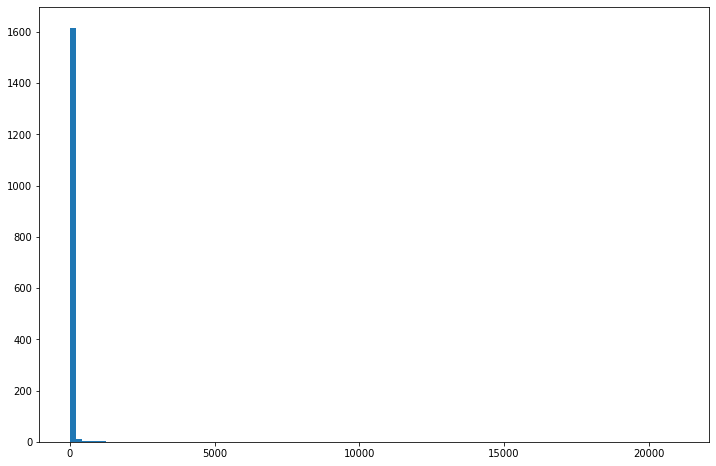

In [92]:
plt.figure(figsize=(12, 8))
plt.hist(count, bins=100)